# Redes não supervisionadas - SOM
O SOM (Self-Organizing Maps) é um modelo de rede neural artificial que é treinado usando aprendizado não supervisionado para produzir uma representação de baixa dimensionalidade dos dados de entrada. A rede funciona como uma rede de mapa topológico, onde os neurônios competem entre si para trazer o melhor resultado possível, por isso também é conhecido como aprendizado por competição.



In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

## Treinamento

In [15]:
# Leitura da imagem
img = plt.imread('../data/LooneyTunes.png')

# Reformulação da matriz de pixels
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

# SOM - Aumento do tamanho da rede para 20x20 com  três componentes de entrada (para as cores RGB) e ajuste dos hiperparâmetros

print('Treinamento...')
# sigma: controla o raio inicial de influência dos neurônios vizinhos durante o treinamento.
# neighborhood_function: determina como a influência dos neurônios vizinhos se propaga durante o treinamento (tente gaussian, bubble, mexican-hat)
som = MiniSom(20, 20, 3, sigma=2., learning_rate=0.1, neighborhood_function='bubble', topology ='hexagonal')
som.random_weights_init(pixels) # atribuindo o peso
starting_weights = som.get_weights().copy() # calculando função discriminante para cada peso da rede
som.train_random(pixels, 100)  # Aumento das épocas de treinamento

print('Quantização...')
qnt = som.quantization(pixels)

print('Construindo a nova imagem...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):
    clustered[np.unravel_index(i, img.shape[:2])] = q
print('Concluído.')

Treinamento...
Quantização...
Construindo a nova imagem...
Concluído.


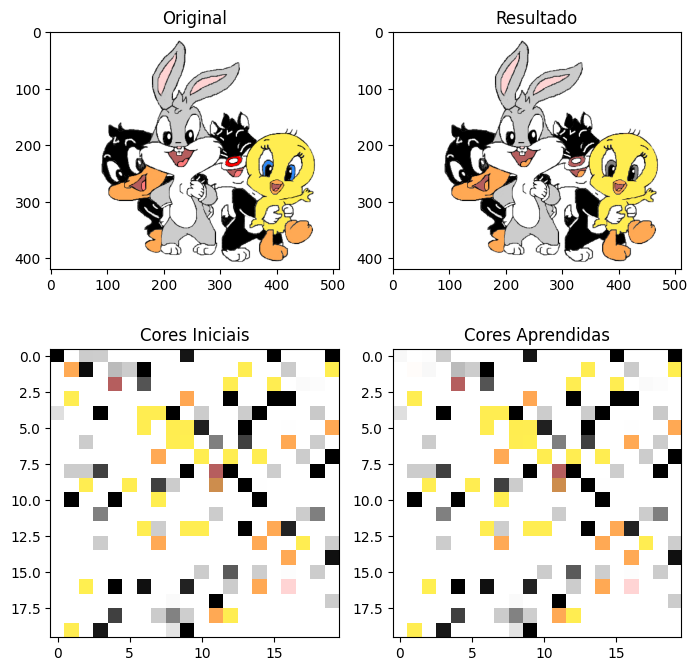

In [16]:

# Exibição do resultado
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Resultado')
plt.imshow(clustered)

plt.subplot(223)
plt.title('Cores Iniciais')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('Cores Aprendidas')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()